# SVM (Support Vector Machine) Algorithm on Salary Dataset

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
sal_train=pd.read_csv("C:\\Users\\Hi\\Desktop\\Python Datasets\\SalaryData_Train(1).csv")
sal_test=pd.read_csv("C:\\Users\\Hi\\Desktop\\Python Datasets\\SalaryData_Test(1).csv")

In [3]:
from glob import glob
#We need to create a csv file through which we can concatenate 2 files using glob module
salaries=glob("C:\\Users\\Hi\\Desktop\\Python Datasets\\SalaryData*.csv")
salaries

['C:\\Users\\Hi\\Desktop\\Python Datasets\\SalaryData_Test(1).csv',
 'C:\\Users\\Hi\\Desktop\\Python Datasets\\SalaryData_Train(1).csv']

In [4]:
#Merging both the datasets in 1 dataset that is going to be named 'Merged'
merged= pd.concat(pd.read_csv(sa) for sa in salaries)
merged.to_csv("C:\\Users\\Hi\\Desktop\\Python Datasets\\Merged(1).csv")
merged=merged.reset_index(drop=True)
merged=pd.DataFrame(merged)

<AxesSubplot:ylabel='workclass'>

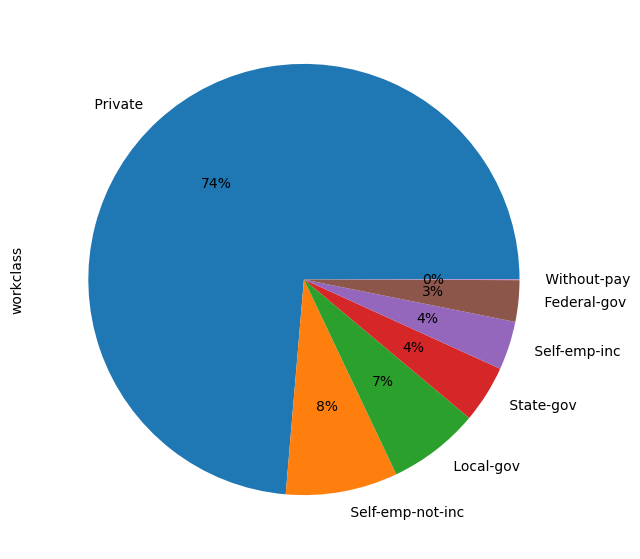

In [5]:
from sklearn.preprocessing import LabelEncoder
#this column has categorical data , finding unique categories
merged.workclass.unique()
merged.workclass.value_counts()
#Here we can see that people with occupation in Private are 74% of the given data 
merged.workclass.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))

In [6]:
le=LabelEncoder()
merged.workclass=le.fit_transform(merged.workclass)


In [7]:

merged.workclass.unique()


array([2, 1, 4, 0, 5, 3, 6])

In [8]:

#this column has categorical data , finding unique categories
merged.education.unique()


array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
       ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [9]:

merged.education.value_counts()


 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

<AxesSubplot:ylabel='education'>

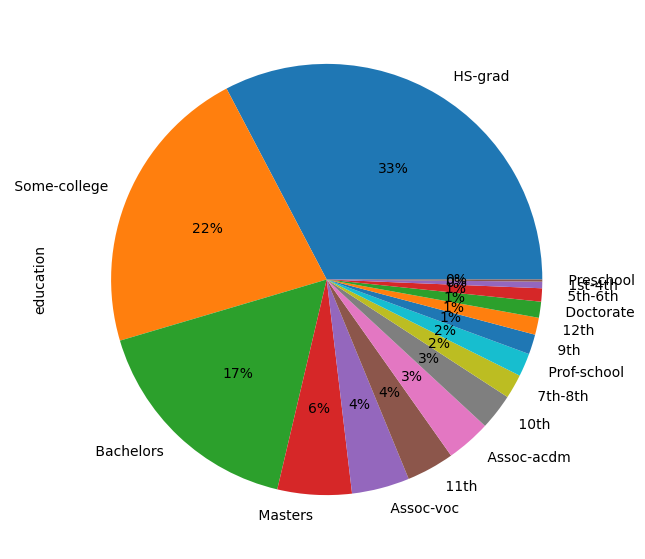

In [10]:

#Here we can see that customers with HS-grade contribute 33% of the data
merged.education.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))


In [11]:

merged.education = le.fit_transform(merged.education)
merged.education.head()


0     1
1    11
2     7
3    15
4     0
Name: education, dtype: int32

In [12]:

#this column has categorical data , finding unique categories
merged.maritalstatus.unique()


array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
       ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [13]:

merged.maritalstatus.value_counts()


 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64

<AxesSubplot:ylabel='maritalstatus'>

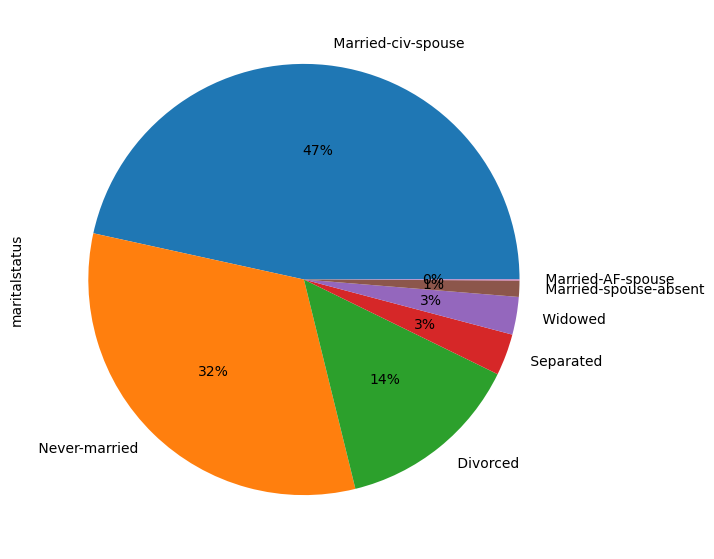

In [14]:

#Here we can see that customers who Married-civ-spouse contribute 47% of the data
merged.maritalstatus.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))


In [15]:


merged.maritalstatus=le.fit_transform(merged.maritalstatus)
merged.maritalstatus.head()


0    4
1    2
2    2
3    2
4    4
Name: maritalstatus, dtype: int32

In [16]:


#this column has categorical data , finding unique categories
merged.occupation.unique()


array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [17]:


merged.occupation.value_counts()


 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2969
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

<AxesSubplot:ylabel='occupation'>

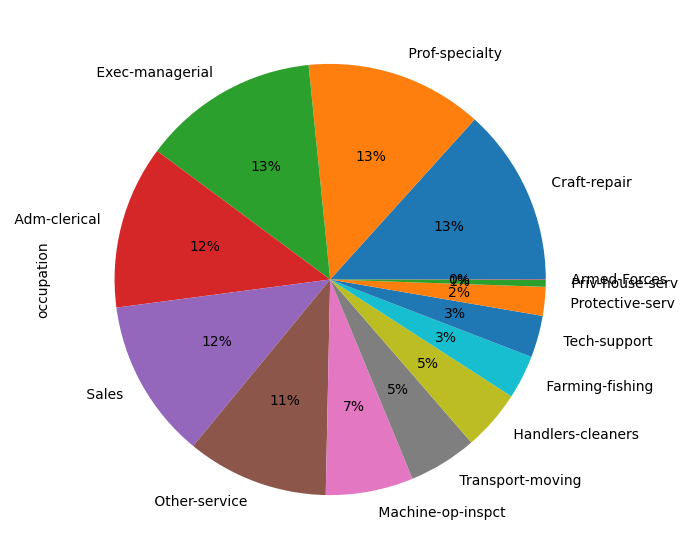

In [18]:

#Here we can see that customers whose occupation is Craft Repair contribute 13% of the data each
merged.occupation.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))


In [19]:


merged.occupation=le.fit_transform(merged.occupation)


In [20]:

merged.occupation.head()


0     6
1     4
2    10
3     6
4     7
Name: occupation, dtype: int32

In [21]:

#this column has categorical data , finding unique categories
merged.relationship.unique()


array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [22]:

merged.relationship.value_counts()


 Husband           18666
 Not-in-family     11702
 Own-child          6626
 Unmarried          4788
 Wife               2091
 Other-relative     1348
Name: relationship, dtype: int64

<AxesSubplot:ylabel='relationship'>

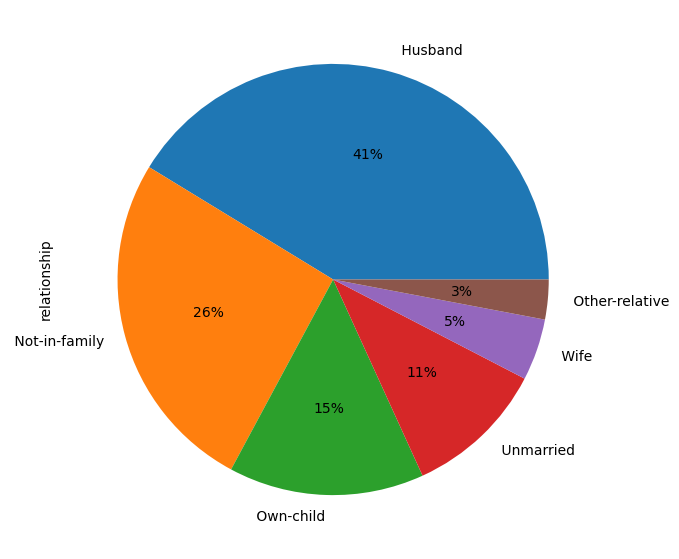

In [23]:

#Here we can see that customers whose Nominees are 'Husband' contribute 41% of the data
merged.relationship.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))


In [24]:

merged.relationship=le.fit_transform(merged.relationship)


In [25]:

#this column has categorical data , finding unique categories
merged.race.unique()


array([' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander'], dtype=object)

In [26]:

merged.race.value_counts()


 White                 38902
 Black                  4228
 Asian-Pac-Islander     1303
 Amer-Indian-Eskimo      435
 Other                   353
Name: race, dtype: int64

<AxesSubplot:ylabel='race'>

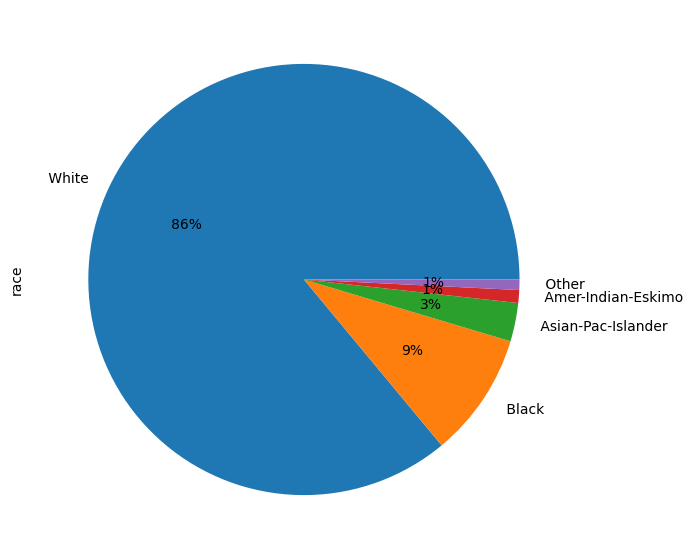

In [27]:

#Here we can see that customers whose Ethnicity is White contribute 86% of the data
merged.race.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))


In [28]:

merged.race=le.fit_transform(merged.race)


In [29]:

#this column has categorical data , finding unique categories
merged.sex.unique()


array([' Male', ' Female'], dtype=object)

In [30]:

merged.sex.value_counts()


 Male      30527
 Female    14694
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

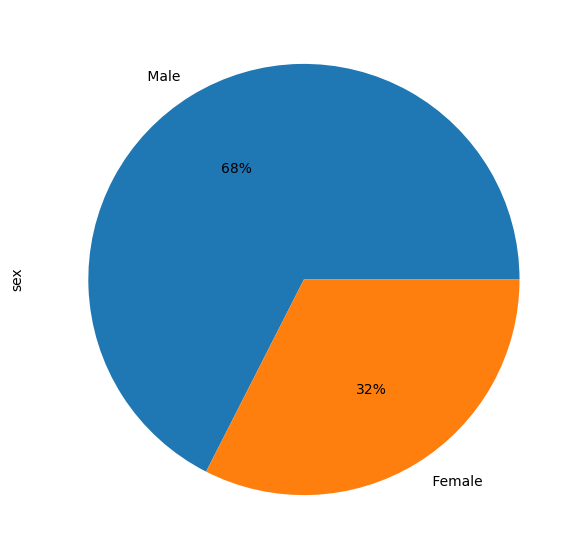

In [31]:


#here Customers who are Male contribute to 68% of the data
merged.sex.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))


In [32]:

merged.sex=le.fit_transform(merged.sex)


In [33]:

#this column has categorical data , finding unique categories
merged.hoursperweek.unique()


array([40, 50, 30, 32, 10, 39, 48, 25, 20, 47, 35, 43, 90, 54, 60, 38, 45,
       36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37, 12, 70, 15, 75,
       52, 84, 42, 80,  8, 68, 99, 65, 17, 72, 53, 96, 21, 46,  3,  1, 49,
       67, 76, 23,  2, 58, 26, 34,  4,  7, 51, 78, 63,  5, 31, 92, 77, 27,
       29, 85,  6, 13, 19, 98, 62, 66, 57, 86, 11, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95], dtype=int64)

In [34]:

merged.hoursperweek.value_counts()


40    21357
50     4094
45     2602
60     2085
35     1776
      ...  
79        1
69        1
87        1
94        1
82        1
Name: hoursperweek, Length: 96, dtype: int64

<AxesSubplot:ylabel='hoursperweek'>

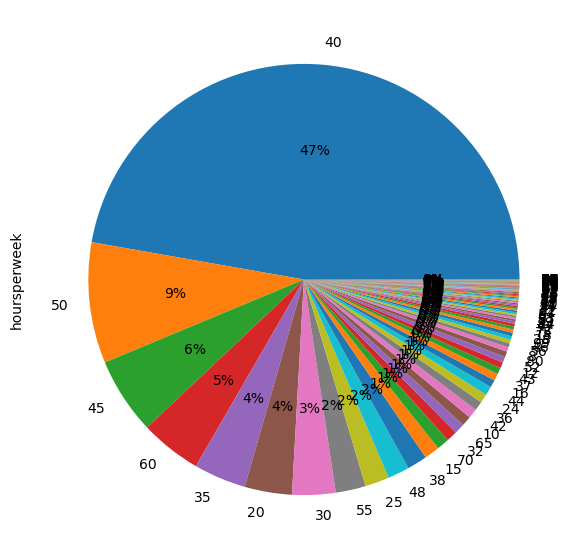

In [35]:

#Customers who work for 40hrs per week  contribute to 47% of data
merged.hoursperweek.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))


In [36]:

merged.hoursperweek=le.fit_transform(merged.hoursperweek)


In [37]:

#this column has categorical data , finding unique categories
merged.native.unique()


array([' United-States', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [38]:

merged.native.value_counts()


 United-States                 41292
 Mexico                          903
 Philippines                     283
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 El-Salvador                     147
 India                           147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         103
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

<AxesSubplot:ylabel='native'>

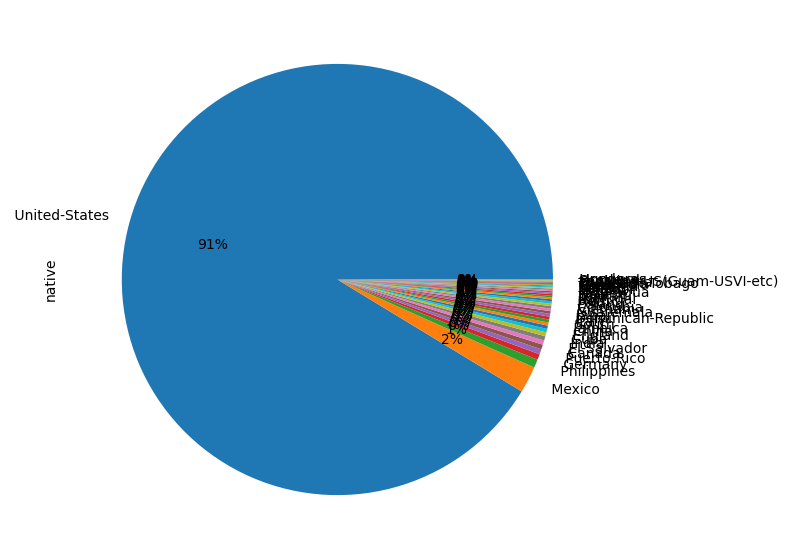

In [39]:

#Customers who are Native to United states contribute to 91% of data
merged.native.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))


In [40]:

merged.native=le.fit_transform(merged.native)


In [41]:

#this column has categorical data , finding unique categories
merged.Salary.unique()


array([' <=50K', ' >50K'], dtype=object)

In [42]:

merged.Salary.value_counts()


 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

<AxesSubplot:ylabel='Salary'>

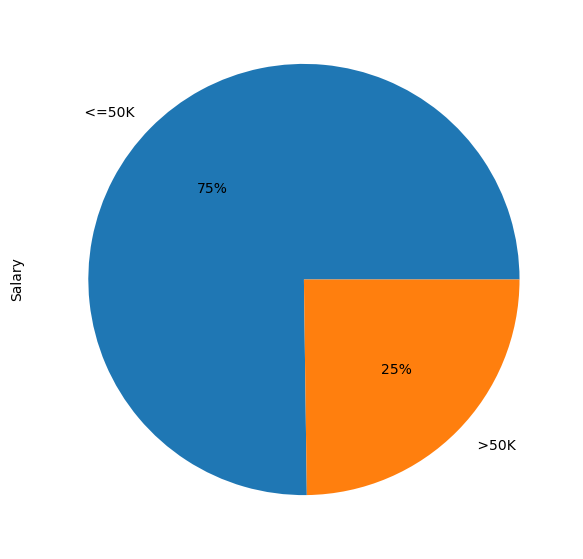

In [43]:

#Customers whose  salary is less than or equal to 50k $ contribute to 75% of data
#Here we have Imbalanced Data in Dependent Variable we have to generate synthetic datapoints by oversampling and undersampling data using SMOTE
merged.Salary.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))


In [44]:

merged.Salary=le.fit_transform(merged.Salary)


In [45]:

#this column has categorical data , finding unique categories
merged.age.unique()


array([25, 38, 28, 44, 34, 63, 24, 55, 65, 36, 26, 48, 43, 20, 37, 45, 22,
       23, 54, 32, 46, 56, 17, 29, 39, 52, 18, 21, 42, 33, 30, 47, 41, 19,
       69, 50, 31, 59, 49, 58, 40, 27, 57, 61, 51, 73, 53, 80, 62, 35, 72,
       64, 68, 66, 60, 67, 71, 70, 90, 77, 81, 74, 78, 82, 75, 85, 76, 89,
       83, 79, 88, 87, 84, 86], dtype=int64)

In [46]:

merged.age.value_counts()


36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
89       1
87       1
86       1
Name: age, Length: 74, dtype: int64

In [47]:

merged.age=le.fit_transform(merged.age)


In [48]:
import sweetviz as sv 
report=sv.analyze(merged)
report.show_html("Salary_DATA_EDA1.html")


c:\Users\Hi\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\Hi\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

c:\Users\Hi\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
c:\Users\Hi\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
c:\Users\Hi\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
c:\Users\Hi\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  st

Report Salary_DATA_EDA1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Lets use SMOTE from imblearn library to handle imbalance data

In [50]:

from sklearn.model_selection import train_test_split
#dropping education no. column as  this feature is not going to help in model creation 
merged1=merged.drop(['educationno'],axis=1)
merged1.columns


Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [61]:

X=merged1.iloc[:,:12]
Y=merged1.iloc[:,12:]
Y.value_counts()


Salary
0         34013
1         11208
dtype: int64

# Lets use SMOTE from imblearn library to handle imbalance data



### Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.





### This procedure can be used to create as many synthetic examples for the minority class as are required. As described in the paper, it suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.


In [52]:

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [53]:

###  We can use the Counter object to summarize the number of examples in each class to confirm the dataset was created correctly.

from collections import Counter
from numpy import where


In [54]:

# summarize class distribution
counter = Counter(Y)
print(counter)


Counter({'Salary': 1})



### We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000).


In [55]:

over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.9)



### We can then chain these two transforms together into a Pipeline.


In [56]:

### The Pipeline can then be applied to a dataset, performing each transformation in turn and returning a final dataset with the accumulation of the transform applied to it, in this case oversampling followed by undersampling.
steps=[('o',over),('u',under)]
pipeline=Pipeline(steps=steps)



### The pipeline can then be fit and applied to our dataset just like a single transform:


In [57]:

#Transform the Dataset by oversampling minority Class and Under-sampling Majority Class
X,Y=pipeline.fit_resample(X,Y)
#Summarize new Class Distribution
counter=Counter(Y)
print(counter)


Counter({'Salary': 1})


In [58]:

#now we can see that minority class increased and majority class decreased 
Y.value_counts()


Salary
0         30233
1         27210
dtype: int64

<AxesSubplot:ylabel='Count'>

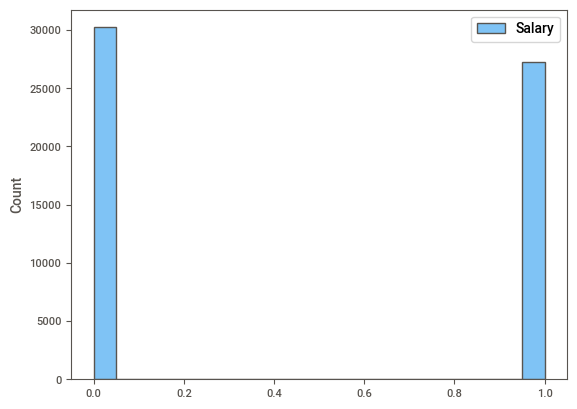

In [60]:
import seaborn as sns
sns.histplot(Y)



# Model Creation after Oversampling and Undersampling


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=46)


In [ ]:
clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001]}]
gscv=GridSearchCV(clf,param_grid=param_grid,cv=10)
gscv.fit(x_train,y_train)

In [ ]:
gscv.best_params_ , gscv.best_score_

In [ ]:
model=SVC(gamma=,C=)

In [ ]:

from yellowbrick import ClassBalance
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix , ROCAUC , ClassPredictionError

#Classification_Report 
cr_visualizer= ClassificationReport(model,support=True)
cr_visualizer.fit(x_train,y_train)
cr_visualizer.score(x_test,y_test)
cr_visualizer.show()


In [ ]:

#confusion_matrix
cm= ConfusionMatrix(model)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)
cm.show()


In [ ]:

#Roc and AUC 
rocauc=ROCAUC(model)
rocauc.fit(x_train,y_train)
rocauc.score(x_test,y_test)
rocauc.show()


In [ ]:

# Lets see with other Algorithms which can provide us Best accuracy on this Dataset

from lazypredict.Supervised import LazyClassifier
d=LazyClassifier(verbose=0,ignore_warnings=False,custom_metric=None)
models,predictions=d.fit(x_train,x_test,y_train,y_test)
print(models)